In [20]:
import time
import os
import platform, subprocess

SPACE = ' '
LINUXVIDEOPATH = '/dev/video0' # ffplay
DEBUG = 0

class mycamera():
    def __init__(self, duration=3, fps=60):
        self.connection = True
        
        # Camera Parameters
        self.DEVICE_ID = 1
        self.WIDTH = 1280
        self.HEIGHT = 720
        self.FPS = fps
        self.FRAMERATE = fps
        self.counter = 0 # used in the fileName
        self.fileName =  ""
        self.readablefileName = ''
        self.VIDEOSIZE = "1280x720"
        self.DURATION = duration
        self.client = ""
        self.photoform = '%01d.png' # what we need is 2.png
        
        
    
    def take_picture(self, isUsingCounter=True, appendix='', folder=''):
        # we don't need this
        # Allright, we need this 
        self.counter += 1
        if isUsingCounter:
            self.fileName = time.strftime("%Y_%m_%d_%H_%M_%S_No", time.localtime()) + str(self.counter)
            if appendix:
                self.fileName += "_" + appendix + self.photoform
            else:
                self.fileName += self.photoform
        else:
            self.fileName = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime()) 
            if appendix:
                self.fileName += "_" + appendix + self.photoform
            else:
                self.fileName += self.photoform
        if DEBUG == 2:
            print("Filename is {}".format(self.fileName))
            return
        if folder:
            folderPath = "image_analysis/{}/".format(folder)
            if not os.path.exists(folderPath):
                try:
                    os.mkdir(folderPath)
                except Exception as e:
                    print(e)
        if not folder:
            self.fileName = "image_analysis/temp/{}".format(self.fileName)
        else:
            self.fileName = folderPath + self.fileName
        
        self.readablefileName = self.fileName[:-8] + '2.png'
        

        if os.path.exists(self.fileName):
            raise Exception("Same File!")
        if "Linux" in platform.platform():
            # Remember to check the path everytime.
            videoPath = LINUXVIDEOPATH
            fParam = "v4l2"
            videoTypeParm = "-input_format"
        elif "Windows" in platform.platform():
            videoPath = "video='C922 Pro Stream Webcam'"
            fParam = "dshow" 
            videoTypeParm = "-vcodec"

        # only the command is different from take_video
        command = "ffmpeg -f {} -i {} -vframes 2 {}".format(
            fParam, 
            videoPath, 
            self.fileName)
        print(command)
        # ffmpeg -f v4l2 -i /dev/video2 -vframes 1 /home/dongagent/github/CameraControl/algorithm/test.png

        if "Linux" in platform.platform():
            # Linux
            return subprocess.Popen([command], stdout=subprocess.PIPE, shell=True)
        elif "Windows" in platform.platform():
            # Windows
            return subprocess.Popen(["pwsh", "-Command", command], stdout=subprocess.PIPE)

In [22]:
cameraa = mycamera()
process = cameraa.take_picture()
process.wait()


ffmpeg -f v4l2 -i /dev/video0 -vframes 2 image_analysis/temp/2022_12_09_02_25_07_No1%01d.png


0

/home/dongagent/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py workdir



SystemExit: 1

/home/dongagent/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
frame = Image.open('image_analysis/anger/2024_11_05_14_50_37_anger_test.png')  # Uncomment if you need to load the image
print(frame.size)

(1280, 720)


# Get the gd face box

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own r

Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Loading emotion model:  resmasknet
[525.60693, 319.62982, 701.2994, 542.67755, 0.9992099]
start_x, start_y, end_x, end_y = 504, 322, 721, 539


(-0.5, 216.5, 216.5, -0.5)

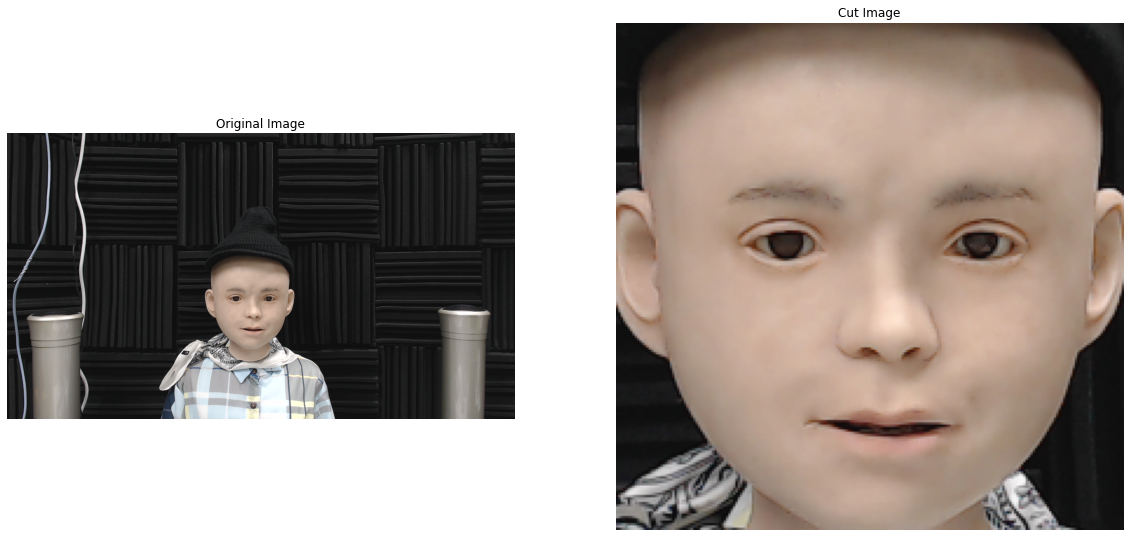

In [1]:
import cv2
import numpy as np
from feat import Detector
from PIL import Image
import matplotlib.pyplot as plt
detector = Detector(landmark_model='mobilefacenet')
def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image


testframe = cv2.imread('image_analysis/test/2024_11_13_14_23_33_disgust_test.png')


facebox = detector.detect_faces(testframe)[0]
print(facebox)
start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
print(f'start_x, start_y, end_x, end_y = {start_x}, {start_y}, {end_x}, {end_y}')
523, 258, 748, 483
504, 322, 721, 539
# 193, 111, 448, 366


# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Original image
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")
# # Cropped image
# axes[1].imshow(face)
# axes[1].set_title("Cropped Image")
# axes[1].axis("off")

# cv2.resize()

face = testframe[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title("Cut Image")
axes[1].axis("off")


In [3]:
h, w

(480, 640)

(1280, 720)


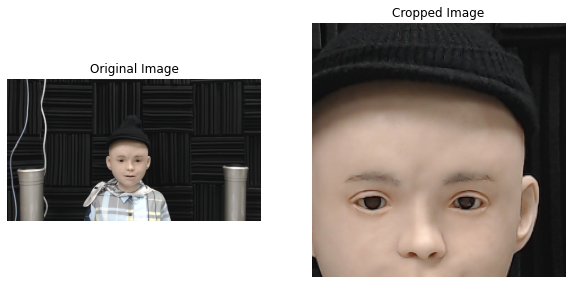

In [2]:
# figure xyhw
from PIL import Image
import matplotlib.pyplot as plt

# Open the image (assuming 'frame' is the original image as a PIL Image)
frame = Image.open('image_analysis/test/2024_11_13_14_23_33_disgust_test.png')  # Uncomment if you need to load the image
print(frame.size)

# Crop coordinates
# ----------- EDIT HERE -------------
# ***********************************
start_x, start_y, end_x, end_y = 523, 258, 748, 483


# ***********************************
# ----------- EDIT HERE -------------



# Crop the image
face = frame.crop((start_x, start_y, end_x, end_y))

# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Original image
axes[0].imshow(frame)
axes[0].set_title("Original Image")
axes[0].axis("off")
# Cropped image
axes[1].imshow(face)
axes[1].set_title("Cropped Image")
axes[1].axis("off")

# Show the plots
plt.show()

In [10]:
def get_default_pose(param, pos):
    res = {}
    for p in pos:
        res[f'x{p}'] = param[p - 1]
    
    return res

import defaultPose

exp = 'disgust'
target = defaultPose.prototypeFacialExpressions[exp]
res = get_default_pose(target, [1, 6, 8, 10, 11, 16, 18, 20, 28, 29, 30, 32])
probe = ""
for k, v in res.items():
    probe += f"'{k}':{v}, "
print('{' + probe[:-2] + '}')

{'x1':86, 'x6':0, 'x8':0, 'x10':0, 'x11':0, 'x16':0, 'x18':0, 'x20':0, 'x28':0, 'x29':0, 'x30':255, 'x32':0}


In [49]:
import human_data
import os

hd = human_data.average_human_order
# print(hd)
emo = 'surprise'
emoo = emo
# print(hd[emo][:10])

tr = [emo + '_' + x.split('_')[1] for x in hd[emoo][:10]]
print(tr)
tr = [t.split('.png')[0] + '_axes_data.csv' for t in tr]
print(tr)

basefolder = 'image_analysis/Exp_collections/230210Exp13Lighting_sys_500/'
files = os.listdir(os.path.join(basefolder, emo))

def get_csv_name():
    res = []
    
    for t in tr:
        for file in files:
            if t in file:
                res.append(file)
                continue

    return res

csvname = get_csv_name()
print(csvname)

['surprise_275.png', 'surprise_245.png', 'surprise_261.png', 'surprise_369.png', 'surprise_337.png', 'surprise_121.png', 'surprise_428.png', 'surprise_407.png', 'surprise_440.png', 'surprise_106.png']
['surprise_275_axes_data.csv', 'surprise_245_axes_data.csv', 'surprise_261_axes_data.csv', 'surprise_369_axes_data.csv', 'surprise_337_axes_data.csv', 'surprise_121_axes_data.csv', 'surprise_428_axes_data.csv', 'surprise_407_axes_data.csv', 'surprise_440_axes_data.csv', 'surprise_106_axes_data.csv']
['2023_02_10_18_49_17_surprise_275_axes_data.csv', '2023_02_10_18_48_09_surprise_245_axes_data.csv', '2023_02_10_18_48_46_surprise_261_axes_data.csv', '2023_02_10_18_52_52_surprise_369_axes_data.csv', '2023_02_10_18_51_36_surprise_337_axes_data.csv', '2023_02_10_18_43_32_surprise_121_axes_data.csv', '2023_02_10_18_55_17_surprise_428_axes_data.csv', '2023_02_10_18_54_24_surprise_407_axes_data.csv', '2023_02_10_18_55_47_surprise_440_axes_data.csv', '2023_02_10_18_43_00_surprise_106_axes_data.csv

In [50]:
import pandas as pd
import re
for c in csvname:
    tmp = pd.read_csv(os.path.join(basefolder, emo, c))
    tmp = tmp.to_dict()
    for k, v in tmp.items():
        if 'x' in k:
            tmp[k] = round(v[0])
            
    match = re.search(r".*(surprise_\d+_axes_data\.csv)", c)
    tmp[emo] = match.group(1)
    print(tmp)
    

{'surprise': 'surprise_275_axes_data.csv', 'x1': 0, 'x10': 0, 'x11': 0, 'x16': 0, 'x18': 255, 'x19': 0, 'x20': 0, 'x28': 255, 'x29': 0, 'x30': 0, 'x32': 255, 'x6': 0, 'x8': 255, 'x9': 0}
{'surprise': 'surprise_245_axes_data.csv', 'x1': 0, 'x10': 0, 'x11': 0, 'x16': 0, 'x18': 0, 'x19': 0, 'x20': 255, 'x28': 0, 'x29': 149, 'x30': 0, 'x32': 255, 'x6': 0, 'x8': 255, 'x9': 21}
{'surprise': 'surprise_261_axes_data.csv', 'x1': 0, 'x10': 255, 'x11': 0, 'x16': 0, 'x18': 255, 'x19': 0, 'x20': 255, 'x28': 72, 'x29': 0, 'x30': 0, 'x32': 255, 'x6': 0, 'x8': 255, 'x9': 0}
{'surprise': 'surprise_369_axes_data.csv', 'x1': 0, 'x10': 255, 'x11': 0, 'x16': 255, 'x18': 0, 'x19': 0, 'x20': 255, 'x28': 0, 'x29': 0, 'x30': 0, 'x32': 255, 'x6': 140, 'x8': 255, 'x9': 255}
{'surprise': 'surprise_337_axes_data.csv', 'x1': 0, 'x10': 255, 'x11': 0, 'x16': 0, 'x18': 9, 'x19': 0, 'x20': 0, 'x28': 0, 'x29': 255, 'x30': 0, 'x32': 255, 'x6': 0, 'x8': 255, 'x9': 149}
{'surprise': 'surprise_121_axes_data.csv', 'x1': 0, '